In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup


In [2]:
# chromedriver = './chromedriver.exe' 
driver = webdriver.Chrome('./chromedriver')
driver.implicitly_wait(3)  # 로딩 될때까지 3초 대기

time.sleep(3)

driver.get("https://everytime.kr/lecture")
time.sleep(2)
                          

id_bar = driver.find_element_by_name('userid')
id_bar.clear()
#id 입력
id_bar.send_keys('')
time.sleep(2)



pw_bar = driver.find_element_by_name('password')
pw_bar.clear()
#pw입력
pw_bar.send_keys('') #비밀번호 입력해야함

pw_bar.send_keys(Keys.RETURN)
time.sleep(3)



bs = BeautifulSoup(driver.page_source, 'html.parser')

a = 0 
while a < 1000:
    a = a + 1
    driver.execute_script("window.scrollTo(0, 100100100100100100100100);")
    




In [3]:
bs = BeautifulSoup(driver.page_source, 'html.parser')

lec_names = bs.select('#container > div:nth-child(4) > div > a > h3')


#2. 강의 점수 
lec_rates = bs.select('#container > div:nth-child(4) > div > a > p.rate > span > span')


#3. 강의평 

lec_reviews = bs.select('#container > div:nth-child(4) > div > a > p.text')

###리스트 정의####################################
ProfList = [] 
LecList = [] 
StarList = [] 
ReviewList =[] 
TotalList = []
###########################################크롤링###################33
#1.강의 이름, 교수님 이름 크롤링
for lec_name in lec_names:

    LecName_Prof = lec_name.text.replace(' ','').split(':')
    
    if len(LecName_Prof) == 2:
        
    
        LecList.append(LecName_Prof[0])
        ProfList.append(LecName_Prof[1])
    
    else:
        LecList.append(LecName_Prof[0])
        ProfList.append('?')


#2. 강의점수 크롤링

for lec_rate in lec_rates:
    
    rate_width = lec_rate['style'].replace(' ', '').replace(';','').split(':')[1]
#     print(rate_width)
    
    if rate_width == '0%':
        LecStar = 0
    elif rate_width == '20%':
        LecStar = 1
    elif rate_width == '40%':
        LecStar = 2
    elif rate_width == '60%':
        LecStar = 3
    elif rate_width == '80%':
        LecStar = 4
    elif rate_width == '100%':
        LecStar = 5
        
    StarList.append(LecStar)
    
    
#3. 강의의 평 크롤링

for lec_review in lec_reviews:
#     print(lec_review.text)
    
    LecReview = lec_review.text
#     print(LecReview)
    ReviewList.append(LecReview)
    
###TotalList 만들기 ####
TempList = [] 
for i in range(0, len(ProfList)):
    
    TempList.append(ProfList[i])
    TempList.append(LecList[i])
    TempList.append(StarList[i])
    TempList.append(ReviewList[i])
    
    TempList = []
    
    TotalList.append(TempList)
    

    
TotalList.pop() #마지막에 계속하여 빈 공백이 들어가서 제거 


[]

In [17]:
#각 수업별 별점과 리뷰들이 나타나 있음 
#중복된 강의, 중복된 교수님들이 존재하므로 앞으로 중복을 제거하여 각 교수님별, 각 강의별 정보를 담도록 해보자
import pandas as pd

df = pd.DataFrame(TotalList)
df.columns = ['Prof', 'Lec', 'Star', 'Reviews']
df.head(15)

Prof             Lec  Star  \
0   박현철  기업가정신과행동(온&오프)     3   
1   장철운     통일학연구의방법과쟁점     3   
2   강아람              채플     3   
3   조은식              채플     1   
4   김륜희       국제금융론(영어)     5   
5   조은식              채플     5   
6   조은식              채플     1   
7   최지웅            알고리즘     2   
8   문정화          섬김의리더십     3   
9   최지웅            알고리즘     5   
10  오경수          데이터베이스     1   
11  조은식              채플     4   
12  조은식              채플     5   
13  이주형              채플     1   
14  권희철            교육사회     3   

                                              Reviews  
0   9시 수업이라 그런지 겨수님께서 출석 늦게 부르심.수업시간에 비해 조끼리 할 일이 ...  
1   레포트 하나 내주셨는데 1면 이내로 쓰는 매우 간단한 레포트를 내주세요시험문제는 논...  
2   2층이 눈치 안보여서 참 편하고 자기 좋아요...하지만 옆이 중국인이라면 좋지 않아...  
3   진짜 이번 학기는 그냥 채플도 문화 채플도 쓰레기였다. 그나마 공감되고 좋았던거는 ...  
4                       기말 공부중인데 양이 정말 많다 너무 많아서 죽을지경  
5                  시간맞춰 가고 출석일수만 채우면 학점받을수 있어요ㅎㅎ좋았습니당  
6   이번에는 2층이라 아주 편했습니다가끔 문화체플일 때 좋은 컨텐츠 감상할 수 있어서 ...  
7   다른 교수들이 너무 별로니까 좋아보이는 것뿐.. 항상 왜 이렇게 별점이 높은지 하나...  
8   봉사하고나서 실습일지를 봉사한 주차 실습일지 제출칸에 내는 것이 핵심입니다. 그 때...  
9   하나하나 콕콕 집어서 가르쳐주심 그저 갓 알고리즘은 웬만하면 최지웅교수님 수업 듣기...  
10  하.. 시간만 떼우러 오신 것 같습니다. 수업 뭘 했는데 시험을 보시는거죠? 무엇을...  
11                       따로 평가가 필요한가요.. 2층이어서 편했습니다 ㅎ  
12                     내용은 중요하지않다. 내 잠을 방해하지만 않으면 된다.  
13                  진짜별로임... 억지로 앉아있는것도 고통스러움.없어지길바랄뿐  
14  <수업 진행 방식>- 여러 책에 있는 내용을 읽으면서 조금 중요한 내용은 칠판에 적...

In [9]:
#중복된 결과를 크롤링했으므로 중복을 제거하여 총 몇명의 교수님의 강의평이 존재하는지 확인
prof = []
for i_ in range(len(TotalList)):
    prof.append(TotalList[i_][0])
    
SetProf= set(prof)
print('?-데이터는 교수님 정보가 없는 데이터, 총 {}명의 교수님들의 평이 존재함'.format(len(SetProf)))


?-데이터는 교수님 정보가 없는 데이터, 총 116명의 교수님들의 평이 존재함


In [10]:
#각 교수님별 진행하시는 강의 목록을 출력할 수 있음
DicList = [] 
for pr in SetProf:

    d = {'교수명': pr}
    d['강의목록'] = str(df[df['Prof'] == pr]['Lec'].unique()).replace("'", '').replace('[', '').replace(']', '').split(' ')

    DicList.append(d)


DicList[:10]

[{'교수명': '이혁배', '강의목록': ['현대인과성서']},
 {'교수명': '조호제', '강의목록': ['교육과정']},
 {'교수명': '김익수', '강의목록': ['프로그래밍1및실습', '프로그래밍2및실습']},
 {'교수명': '유병욱', '강의목록': ['비영리조직론(나(행정·정보관리))']},
 {'교수명': '이지은', '강의목록': ['민법총칙']},
 {'교수명': '김석윤', '강의목록': ['기초전자공학']},
 {'교수명': '강범구', '강의목록': ['공학화학2']},
 {'교수명': '김효숙', '강의목록': ['PR크리에이티브론']},
 {'교수명': '박현철', '강의목록': ['기업가정신과행동(온&오프)']},
 {'교수명': '왕영항', '강의목록': ['인사관리']}]

In [116]:
#데이터 프레임으로 보기 좋게 변환 

df1 = pd.DataFrame(DicList)
cols = ['교수명', '강의목록']

df1 = df1[cols]
df1.head()

교수명                    강의목록
0  봉진숙  [AI및데이터분석의기초A그룹(온&오프)]
1  이찬규          [기초프랑스어(불문제외)]
2  조성빈         [금융경제학(영어-한국어)]
3  전문석               [정보보안(가)]
4  진환주            [예술과과학기술의만남]

# 교수님 평균 평점 체크하가ㅣ 

In [12]:
# df[df['Prof'] == '교수님 성함']
#교수님들의 평균 평점을 확인할 수 없음

ProfListSet = set(ProfList)
ProfStarMean = {}
for i in ProfListSet:
#     print(df[df['Prof'] == i]['Star'].mean())
    ProfStarMean[i] = df[df['Prof'] == i]['Star'].mean()
    
# ProfStarMean['봉진숙']
ProfStarMean

{'이혁배': 5.0,
 '조호제': 5.0,
 '김익수': 5.0,
 '유병욱': 5.0,
 '이지은': 4.0,
 '김석윤': 5.0,
 '강범구': 3.0,
 '김효숙': 1.0,
 '박현철': 3.0,
 '왕영항': 3.0,
 '배명진': 1.0,
 '김영성': 5.0,
 '장철운': 3.0,
 '문정화': 4.5,
 '박창수': 5.0,
 'JayFraser': 4.0,
 '박상선': 4.0,
 '박창호': 3.0,
 '박의정': 1.0,
 '이완석': 1.0,
 '박언경': 3.0,
 '장시은': 4.0,
 '강달원': 3.0,
 '이광진': 2.0,
 '유미애': 4.0,
 '이상호': 3.5,
 '송현주': 3.0,
 '한래희': 5.0,
 '김명배': 4.0,
 '정선태': 1.0,
 '전문석': 3.0,
 '유재우': 4.0,
 '조은애': 5.0,
 '장의진': 4.0,
 '장정빈': 2.0,
 '김창배': 3.0,
 '이승복': 4.0,
 '강근석': 3.0,
 '김진홍': 1.0,
 '강의선': 4.5,
 '김기덕': 3.0,
 '조은식': 3.64,
 '강동구': 4.5,
 '민승근': 3.0,
 '이국배': 4.0,
 '성신형': 5.0,
 '정희진': 5.0,
 '조성빈': 3.0,
 '이은주': 4.5,
 '이찬규': 5.0,
 '이재성': 4.0,
 '송영숙': 1.0,
 '한헌수': 1.5,
 '박종소': 5.0,
 '이주형': 3.6666666666666665,
 '김완섭': 4.333333333333333,
 '안승호': 1.0,
 '오경수': 1.0,
 '최선영': 5.0,
 '신호철': 5.0,
 '봉진숙': 3.5,
 '임정현': 4.0,
 '김병기': 4.0,
 '이동렬': 5.0,
 '김민석': 4.0,
 '진환주': 5.0,
 '구연정': 2.0,
 '조은희': 1.0,
 '권희철': 3.0,
 '?': 3.25,
 '오형국': 3.0,
 '김윤곤': 1.0,
 '김영주': 4.0,
 '심현주': 4.0,
 '한

# 강의별로 평점 확인하기 

In [18]:
#중복된 여러 강의들이 존재한다
#a교수님의 채플강의 b교수님의 채플강의 
#그리하여 이러한 방법을 사용하여 각 강의별(모든 교수님 종합) 평점을 확인 할 수 있다.

LecListSet = set(LecList)
LecStarMean = {}

for j in LecListSet:
    df[df['Lec'] == j]['Star'].mean()
    LecStarMean[j] = df[df['Lec'] == j]['Star'].mean()

LecStarMean

{'공업유기화학2(영어-한국어)(온&오프)': 1.0,
 '프로그래밍1및실습': 5.0,
 '운영체제(나반)': 2.0,
 '대학수학': 3.0,
 '컴파일러': 4.0,
 '기초한문': 4.0,
 '기업가정신과행동(온&오프)': 3.0,
 '통일학연구의방법과쟁점': 3.0,
 '사고와표현': 5.0,
 '독일어입문(독어독문학과제외)': 5.0,
 '국제통상개론': 5.0,
 '창업성장전략': 1.0,
 '컴퓨팅적사고B그룹(온&오프)': 4.5,
 '현대인과성서(영어)': 5.0,
 '경제원론': 1.0,
 '알고리즘': 4.0,
 '컴퓨터학의이해(컴퓨터,소프트제외)': 5.0,
 'AcademicWritinginEnglish2(영어)': 5.0,
 '대중매체와현대사회': 2.0,
 '국제무역의이해(글로벌통상제외)': 4.5,
 '국민경제의이해': 3.0,
 '화학2및실험': 5.0,
 '컴퓨팅적사고A그룹(온&오프)': 4.125,
 '한반도평화와통일(최대수강신청가능학점초과하여신청가능)(온&오프)': 1.0,
 '소셜미디어의이해': 2.0,
 '분자생물학실험': 4.0,
 '회계원리': 5.0,
 '금융경제학(영어-한국어)': 3.0,
 '공학수학1(가)': 4.0,
 '교육사회': 3.0,
 '동영상콘텐츠제작과활용': 5.0,
 '생활속의수학': 2.0,
 '숭실명예규약': 4.666666666666667,
 '아시아공동체의이해': 1.0,
 '조직행동론(영어-한국어)': 4.0,
 '프로그래밍2및실습': 5.0,
 '섬김의리더십': 4.333333333333333,
 '디지털시스템설계(온&오프)': 1.0,
 '논리와사고': 5.0,
 '프로그래밍기초(Python)': 4.0,
 '숭실인의역량과진로탐색2': 1.0,
 '정보보안(가)': 3.0,
 'PR크리에이티브론': 1.0,
 '채플': 3.75,
 '경제원론1': 5.0,
 '미시경제학': 5.0,
 '공학화학2': 3.0,
 '숭실과기독교': 3.0,
 '합창과공동체인성': 4.5,
 '국제무역론'

In [21]:
#이러한 방법으로 각 교수님 별 평균 별점과 진행하시는 강의 목록을 알 수 있음

DicList = [] 
for pr in SetProf:
    
    d = {'교수명': pr,'평균별점':round(ProfStarMean[pr],1)}
    d['강의목록'] = str(df[df['Prof'] == pr]['Lec'].unique()).replace("'", '').replace('[', '').replace(']', '').split(' ')
    
    DicList.append(d)


df2 = pd.DataFrame(DicList)
cols = ['교수명', '평균별점', '강의목록']

df2 = df2[cols]
df2.head(20)

교수명  평균별점                    강의목록
0         이혁배   5.0                [현대인과성서]
1         조호제   5.0                  [교육과정]
2         김익수   5.0  [프로그래밍1및실습, 프로그래밍2및실습]
3         유병욱   5.0    [비영리조직론(나(행정·정보관리))]
4         이지은   4.0                  [민법총칙]
5         김석윤   5.0                [기초전자공학]
6         강범구   3.0                 [공학화학2]
7         김효숙   1.0             [PR크리에이티브론]
8         박현철   3.0        [기업가정신과행동(온&오프)]
9         왕영항   3.0                  [인사관리]
10        배명진   1.0                 [컴퓨터구조]
11        김영성   5.0             [글로벌금융자산관리]
12        장철운   3.0           [통일학연구의방법과쟁점]
13        문정화   4.5        [섬김의리더십, 숭실명예규약]
14        박창수   5.0          [미시경제학, 경제원론1]
15  JayFraser   4.0               [마케팅(영어)]
16        박상선   4.0               [예술과인간이해]
17        박창호   3.0               [정보사회공동체]
18        박의정   1.0               [서비스운영관리]
19        이완석   1.0               [서비스운영관리]

In [15]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy  as np
from PIL import Image
from wordcloud import ImageColorGenerator
import re
from konlpy.tag import Kkma
from konlpy.tag import Twitter
import nltk
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf').get_name()
rc('font', family=font_name)

t = Twitter()


list(df['Reviews'])

text = ','.join(list(df['Reviews']))
text[0:800]



"9시 수업이라 그런지 겨수님께서 출석 늦게 부르심.수업시간에 비해 조끼리 할 일이 많은 수업,레포트 하나 내주셨는데 1면 이내로 쓰는 매우 간단한 레포트를 내주세요시험문제는 논술형으로 쓰는데 평소 뉴스로 북한 많이 접하셨으면 무난하리라 생각되는 문제들이에요근데 좀 졸려요...많이 졸려요!,2층이 눈치 안보여서 참 편하고 자기 좋아요...하지만 옆이 중국인이라면 좋지 않아요잘때 냄새나더라고요...,진짜 이번 학기는 그냥 채플도 문화 채플도 쓰레기였다. 그나마 공감되고 좋았던거는 학생참여 채플... 에휴,기말 공부중인데 양이 정말 많다 너무 많아서 죽을지경,시간맞춰 가고 출석일수만 채우면 학점받을수 있어요ㅎㅎ좋았습니당,이번에는 2층이라 아주 편했습니다가끔 문화체플일 때 좋은 컨텐츠 감상할 수 있어서 좋았습니다.,다른 교수들이 너무 별로니까 좋아보이는 것뿐.. 항상 왜 이렇게 별점이 높은지 하나도 모르겠는 분.  자기 객관화 못하는 광신도들이 많아서 그런지.. 본인 상담하러 오는 학생들 심심찮게 다른 반에서 돌려까기나 하시는 분임. 다들 생각이란 걸 하고 찬양하셨으면 좋겠네요. 1대1 로 봤을 때는 좋은 교수님일 수 있겠으나,  뒤에서 자기 상담 내용 까발리는게 무슨 교수 자질이 있는지 모르겠습니다. 교수 하신다는 분이 매번 진도 하나 못빼고 75분 내내 허덕이면서 이동시간 배려 안 하고 2분 정도 늦게 끝내주는 것도 너무 별로고요. 학생이 질문하거나 틀린거 지적하면 '이따가 설명할거야.' '나도 사람이야. 틀려' 예민하게 구는 것도 적당히 하셨으면 좋겠습니다.,봉사하고나서 실습일지를 봉사한 주차 실습일지 제출칸에"

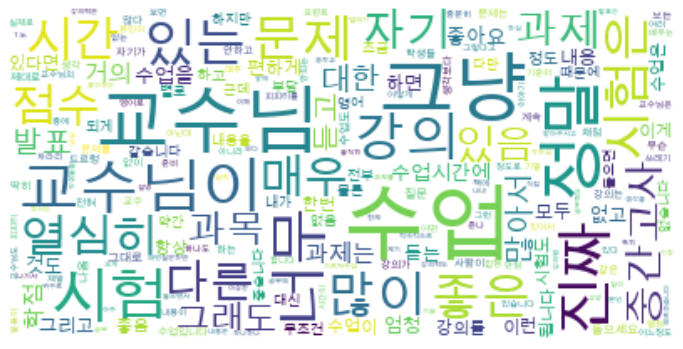

In [162]:
wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf', background_color="white", max_font_size=50).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [163]:
tokens = t.nouns(text)
ko =  nltk.Text(tokens)
dic = dict(ko.vocab().most_common(700))

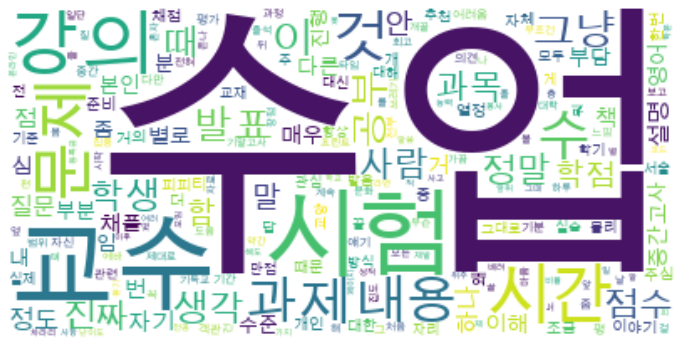

In [165]:
tokens = t.nouns(text)
ko =  nltk.Text(tokens)
dic = dict(ko.vocab().most_common(700))

wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf', background_color="white", max_font_size=1000).generate_from_frequencies(dic)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [203]:
from collections import Counter


from konlpy.tag import Twitter
twitter = Twitter()


sentences_tag = []
for sentence in list(df['Reviews']):
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)

#명사, 형용사인 품사만 선별해 리스트에 담기
noun_adj_list = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun','Adjective']:
            noun_adj_list.append(word)

# 품사별 빈도수 계산 -> 상위 빈도 10위 까지 출력
counts = Counter(noun_adj_list)
print(counts.most_common(10))

[('수업', 146), ('교수', 111), ('시험', 92), ('강의', 71), ('시간', 59), ('문제', 54), ('수', 41), ('것', 41), ('내용', 38), ('과제', 37)]


# 모두 합친 코드

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup

# chromedriver = './chromedriver.exe' 
driver = webdriver.Chrome('./chromedriver')
driver.implicitly_wait(3)  # 로딩 될때까지 3초 대기

time.sleep(3)

driver.get("https://everytime.kr/lecture")
time.sleep(2)
                          

id_bar = driver.find_element_by_name('userid')
id_bar.clear()
id_bar.send_keys('aay12345')
time.sleep(2)



pw_bar = driver.find_element_by_name('password')
pw_bar.clear()
#비밀번호 입력
pw_bar.send_keys('') #비밀번호 입력해야함

pw_bar.send_keys(Keys.RETURN)
time.sleep(3)



bs = BeautifulSoup(driver.page_source, 'html.parser')

a = 0 
while a < 1000:
    a = a + 1
    driver.execute_script("window.scrollTo(0, 100100100100100100100100);")
    




bs = BeautifulSoup(driver.page_source, 'html.parser')

lec_names = bs.select('#container > div:nth-child(4) > div > a > h3')


#2. 강의 점수 
lec_rates = bs.select('#container > div:nth-child(4) > div > a > p.rate > span > span')


#3. 강의평 

lec_reviews = bs.select('#container > div:nth-child(4) > div > a > p.text')

###리스트 정의####################################
ProfList = [] 
LecList = [] 
StarList = [] 
ReviewList =[] 
TotalList = []
###########################################크롤링###################33
#1.강의 이름, 교수님 이름 크롤링
for lec_name in lec_names:

    LecName_Prof = lec_name.text.replace(' ','').split(':')
    
    if len(LecName_Prof) == 2:
        
    
        LecList.append(LecName_Prof[0])
        ProfList.append(LecName_Prof[1])
    
    else:
        LecList.append(LecName_Prof[0])
        ProfList.append('?')


#2. 강의점수 크롤링

for lec_rate in lec_rates:
    
    rate_width = lec_rate['style'].replace(' ', '').replace(';','').split(':')[1]
#     print(rate_width)
    
    if rate_width == '0%':
        LecStar = 0
    
    elif rate_width == '20%':
        LecStar = 1
    
    elif rate_width == '40%':
        LecStar = 2
    
    
    elif rate_width == '60%':
        LecStar = 3
        
    elif rate_width == '80%':
        LecStar = 4
        
    elif rate_width == '100%':
        LecStar = 5
        
    StarList.append(LecStar)
    
    
#3. 강의의 평 크롤링

for lec_review in lec_reviews:
#     print(lec_review.text)
    
    LecReview = lec_review.text
#     print(LecReview)
    ReviewList.append(LecReview)
    
###TotalList 만들기 ####
TempList = [] 
for i in range(0, len(ProfList)):
    
    TempList.append(ProfList[i])
    TempList.append(LecList[i])
    TempList.append(StarList[i])
    TempList.append(ReviewList[i])
    
    TempList = []
    
    TotalList.append(TempList)
    

    
TotalList.pop() #마지막에 계속하여 빈 공백이 들어가서 제거 

###################################################################
#각 수업별 별점과 리뷰들이 나타나 있음 
#중복된 강의, 중복된 교수님들이 존재하므로 앞으로 중복을 제거하여 각 교수님별, 각 강의별 정보를 담도록 해보자
import pandas as pd

df = pd.DataFrame(TotalList)
df.columns = ['Prof', 'Lec', 'Star', 'Reviews']

print('\n\n\n', '='*60)
print('#중복된 강의, 중복된 교수님들이 존재하므로 앞으로 중복을 제거하여 각 교수님별, 각 강의별 정보를 담도록 해보자')
print(df.head())

###################################################################
#중복된 결과를 크롤링했으므로 중복을 제거하여 총 몇명의 교수님의 강의평이 존재하는지 확인
prof = []
for i_ in range(len(TotalList)):
    prof.append(TotalList[i_][0])
    
SetProf= set(prof)
print('\n\n\n', '='*60)
print('?-데이터는 교수님 정보가 없는 데이터, 총 {}명의 교수님들의 평이 존재함'.format(len(SetProf)))

######################################################################
#각 교수님별 진행하시는 강의 목록을 출력할 수 있음

DicList = [] 
for pr in SetProf:

    d = {'교수명': pr}
    d['강의목록'] = str(df[df['Prof'] == pr]['Lec'].unique()).replace("'", '').replace('[', '').replace(']', '').split(' ')
    
    DicList.append(d)

print('\n\n\n', '='*60)
print('각 교수님별 진행하시는 강의 목록을 출력할 수 있음')
print(DicList[:5])

######################################################################
#데이터 프레임으로 보기 좋게 변환 

df1 = pd.DataFrame(DicList)
cols = ['교수명', '강의목록']

df1 = df1[cols]
print('\n\n\n', '='*60)
print('#데이터 프레임으로 보기 좋게 변환 ')
print(df1.head())


######################################################################
# df[df['Prof'] == '교수님 성함']
#교수님들의 평균 평점을 확인할 수 없음

ProfListSet = set(ProfList)
ProfStarMean = {}
for i in ProfListSet:
#     print(df[df['Prof'] == i]['Star'].mean())
    ProfStarMean[i] = df[df['Prof'] == i]['Star'].mean()
    
# ProfStarMean['봉진숙']
print('\n\n\n', '='*60)
print('#교수님들의 평균 평점(모든 강의 종합하여 합한 평균)을 확인할 수 없음')
print(ProfStarMean)


######################################################################
#중복된 여러 강의들이 존재한다
#a교수님의 채플강의 b교수님의 채플강의 
#그리하여 이러한 방법을 사용하여 각 강의별(모든 교수님 종합) 평점을 확인 할 수 있다.

LecListSet = set(LecList)
LecStarMean = {}

for j in LecListSet:
    df[df['Lec'] == j]['Star'].mean()
    LecStarMean[j] = df[df['Lec'] == j]['Star'].mean()
    
    
print('\n\n\n', '='*60)
print("""#중복된 여러 강의들이 존재한다
#a교수님의 채플강의 b교수님의 채플강의 
#그리하여 이러한 방법을 사용하여 각 강의별(모든 교수님 종합) 평점을 확인 할 수 있다.""")
print(LecStarMean)

######################################################################    
#각 교수님별 진행하시는 강의 목록을 출력할 수 있음

DicList = [] 
for pr in SetProf:

    d = {'교수명': pr,'평균별점':ProfStarMean[pr]}
    
    d['강의목록'] = str(df[df['Prof'] == pr]['Lec'].unique()).replace("'", '').replace('[', '').replace(']', '').split(' ')
    
    DicList.append(d)


df2 = pd.DataFrame(DicList)
cols = ['교수명', '평균별점', '강의목록']
df2 = df2[cols]


print('\n\n\n', '='*60)
print('#각 교수님별 진행하시는 강의 목록을 출력할 수 있음')
print(df2)



######################################################################
#이러한 방법으로 각 교수님 별 평균 별점과 진행하시는 강의 목록을 알 수 있음

DicList = [] 
for pr in SetProf:
    
    d = {'교수명': pr,'평균별점':round(ProfStarMean[pr],1)}
    d['강의목록'] = str(df[df['Prof'] == pr]['Lec'].unique()).replace("'", '').replace('[', '').replace(']', '').split(' ')
    
    DicList.append(d)


df2 = pd.DataFrame(DicList)
cols = ['교수명', '평균별점', '강의목록']

df2 = df2[cols]
print('\n\n\n', '='*60)
print('이러한 방법으로 각 교수님 별 평균 별점과 진행하시는 강의 목록을 알 수 있음')
print(df2)









######################################################################
#리뷰 분석
print('\n\n\n', '='*60)
print('\n\n\n리뷰 분석')

import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy  as np
from PIL import Image
from wordcloud import ImageColorGenerator
import re
from konlpy.tag import Kkma
from konlpy.tag import Twitter
import nltk
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf').get_name()
rc('font', family=font_name)

t = Twitter()


list(df['Reviews'])

text = ','.join(list(df['Reviews']))
print('\n\n\n', '='*60)
print('리뷰데이터 통합: \n\n')
print(text)

######################################################################
#워드클라우드1
wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf', background_color="white", max_font_size=50).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

######################################################################
#워드클라우드2

tokens = t.nouns(text)
ko =  nltk.Text(tokens)
dic = dict(ko.vocab().most_common(700))

wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf', background_color="white", max_font_size=1000).generate_from_frequencies(dic)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

######################################################################
#빈도수를 분석하여 많이 나타난 단어 출력 
from collections import Counter


from konlpy.tag import Twitter
twitter = Twitter()


sentences_tag = []
for sentence in list(df['Reviews']):
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)

#명사, 형용사인 품사만 선별해 리스트에 담기
noun_adj_list = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun','Adjective']:
            noun_adj_list.append(word)

# 품사별 빈도수 계산 -> 상위 빈도 10위 까지 출력
counts = Counter(noun_adj_list)
print('\n\n\n', '='*60)
print('# 품사별 빈도수 계산 -> 상위 빈도 10위 까지 출력')
print(counts.most_common(10))

In [28]:


good_test  = {'시험':['쉬운', '쉬', '배운', '조금'], 
              '난이도':['쉬','쉬운','중간', '안어려'],
             '중간': ['쉬운', '쉬', '배운', '조금', '안어려'],
             '기말': ['쉬운', '쉬', '배운', '조금', '안어려'],
             '퀴즈': ['없','안해','쉬운', '쉬', '배운', '조금', '안어려']}

bad_test = {'시험' : ['어려', '어려운', '안배운','배우지않','뜬금', '자주'],
           '난이도': ['어려운', '어려', '쉽지않'],
           '중간' : ['어려', '어려운', '안배운','배우지않','뜬금', '자주'],
           '기말': ['어려', '어려운', '안배운','배우지않','뜬금', '자주']}

good_assignment = {'과제': ['적은', '별로','많지않','안많은','가끔','쉬', '어렵지않'],
                   '숙제' : ['적은', '별로','많지않','안많은','가끔'],
                   '프로젝트' : ['적은', '별로','많지않','안많은','가끔']}

bad_assignment = {'과제': ['많', '자주', '매주','매일', '어려워'],
                  '숙제': ['많', '자주', '매주','매일', '어려워'],
                  '프로젝트' : ['많', '자주', '매주','매일', '어려워']}
            
           


In [27]:
def say_hi(name):
    print(name, '아 안녕!')


say_hi(name = '기문')
print(name)

기문 아 안녕!


NameError: name 'name' is not defined

In [21]:
# global num_stamp
num_stamp = 0  # 쿠폰 스탬프가 찍힌 횟수 (전역변수)

def stamp():
        global num_stamp



    """쿠폰 스탬프가 찍힌 횟수를 증가시키고, 화면에 출력한다."""
    num_stamp = num_stamp + 1  # ❶ 전역변수를 수정하려고 시도함
    print(num_stamp)


stamp()

1


In [4]:
! open .